In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
#Import data
#Create dataframe using dataset
#View data using groupby
data = pd.read_csv('Desktop/TJ_Dataset.csv', header=0)
data = data.dropna()
df = pd.DataFrame({'Score': data['Score'],'Conclusion': data['Conclusion'],'Score_Level': data['Score_Level'],'Name': data['Name'], 'T1': data['Threshold_1'],'T2': data['Threshold_2'],'SI_Conversion': data['SI_Conversion']})

In [3]:
#set dataframe index
df.set_index("Name", inplace=True)

In [4]:
#Filter dataset name selecting rows with test name matching the defined list
#Store in new dataframe
df1= df.loc[['Alkaline Phosphatase ',  'Alpha Feto- Protein',  'Basophils',  'Carcino-embryonic Antigen', 'Creatinine ', 'Eosinophils', 'Globulin ',  'Urine PH',  'Urine specific gravity',  'e GFR']]
df1

,Score,Conclusion,Score_Level,T1,T2,SI_Conversion
Name,,,,,,
Alkaline Phosphatase,77.000,Desirable,1,36.000,120.000,1.0
Alkaline Phosphatase,70.000,Desirable,1,36.000,120.000,1.0
Alkaline Phosphatase,72.000,Desirable,1,36.000,120.000,1.0
Alkaline Phosphatase,40.000,Desirable,1,36.000,120.000,1.0
Alkaline Phosphatase,69.000,Desirable,1,36.000,120.000,1.0
Alkaline Phosphatase,64.000,Desirable,1,36.000,120.000,1.0
Alkaline Phosphatase,86.000,Desirable,1,36.000,120.000,1.0
Alkaline Phosphatase,82.000,Desirable,1,36.000,120.000,1.0
Alkaline Phosphatase,50.000,Desirable,1,36.000,120.000,1.0


In [5]:
#Replace text to numerical value for numerical analysis
textReplace = {'Desirable': 0, 'High': 2, 'Low': 1}
df1.Conclusion =[textReplace[i] for i in df1.Conclusion]

C:\Users\L30908\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


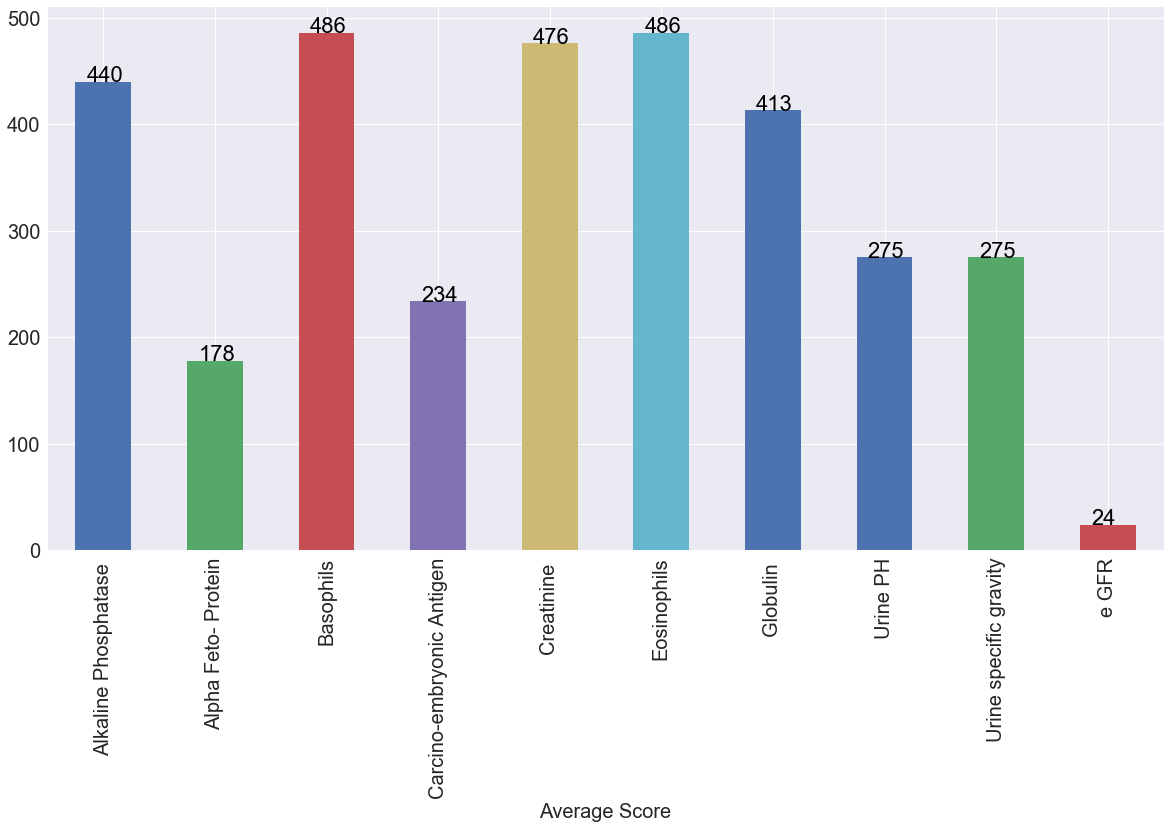

In [6]:
#Count number of rows per test name
ax = df1.groupby('Name').count()['Score'].plot(figsize=(20,10), kind='bar', fontsize=20)
plt.xlabel('Average Score', fontsize=20);

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.1, i.get_height(), \
            str(round(i.get_height(), 2)), fontsize=22,
                color='black')

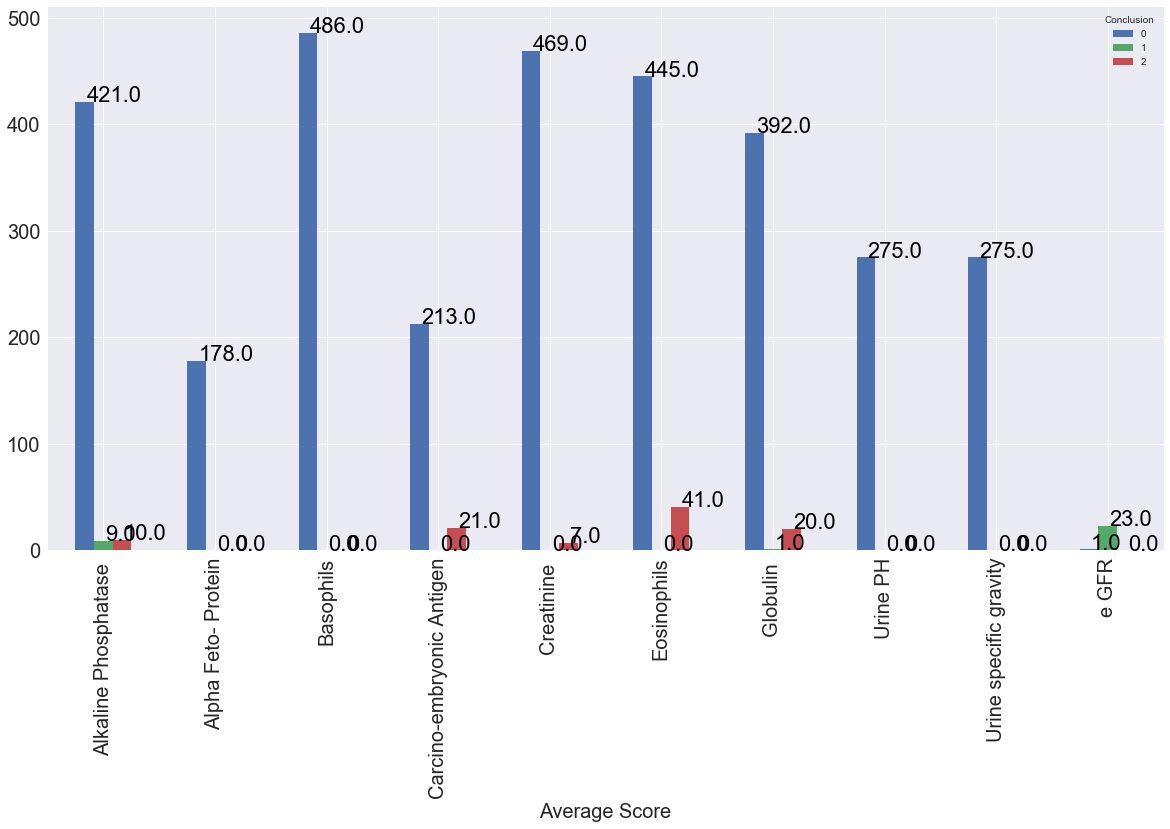

In [7]:
#Count numhber of conclusions per test name
ax = df1.groupby(['Name','Conclusion']).count().unstack()['Score'].plot(figsize=(20,10), kind='bar', fontsize=20)
plt.xlabel('Average Score', fontsize=20);

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.1, i.get_height(), \
            str(round(i.get_height(), 2)), fontsize=22,
                color='black')

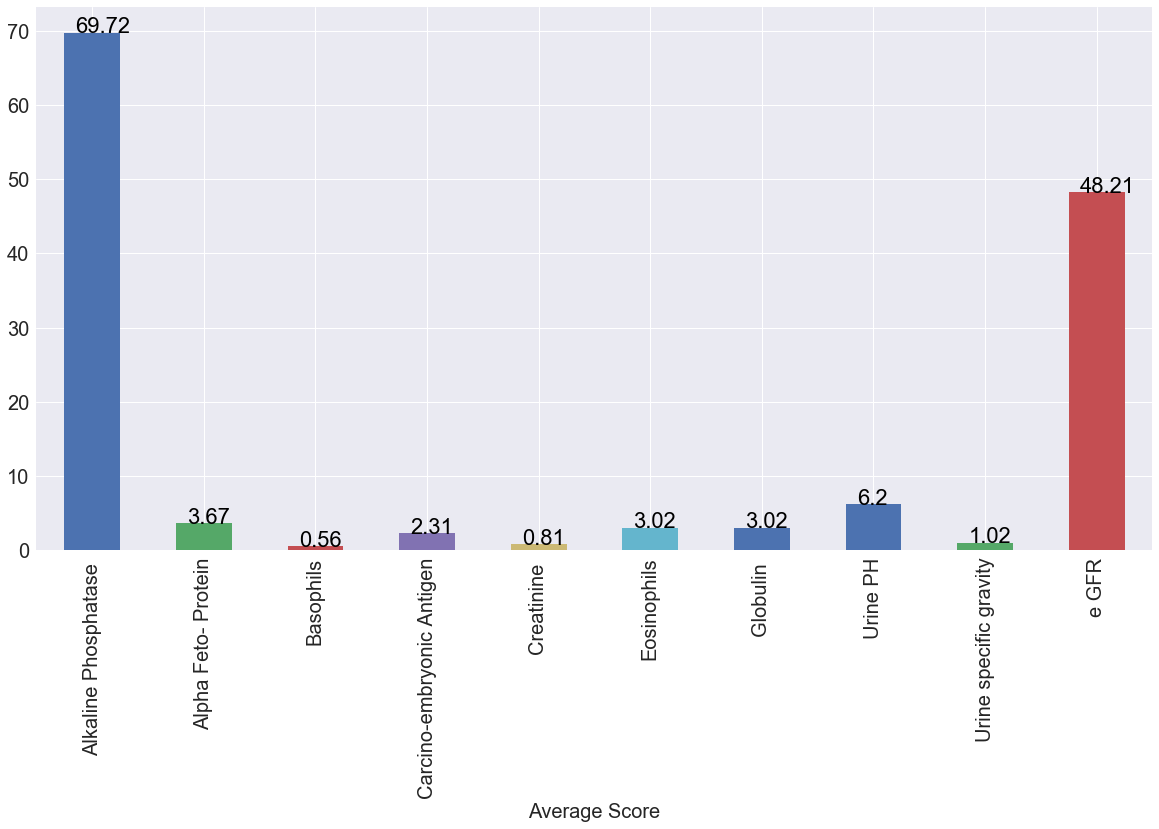

In [8]:
#Count mean score per test name
ax = df1.groupby(['Name']).mean()['Score'].plot(figsize=(20,10), kind='bar', fontsize=20)
plt.xlabel('Average Score', fontsize=20);

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.1, i.get_height(), \
            str(round(i.get_height(), 2)), fontsize=22,
                color='black')

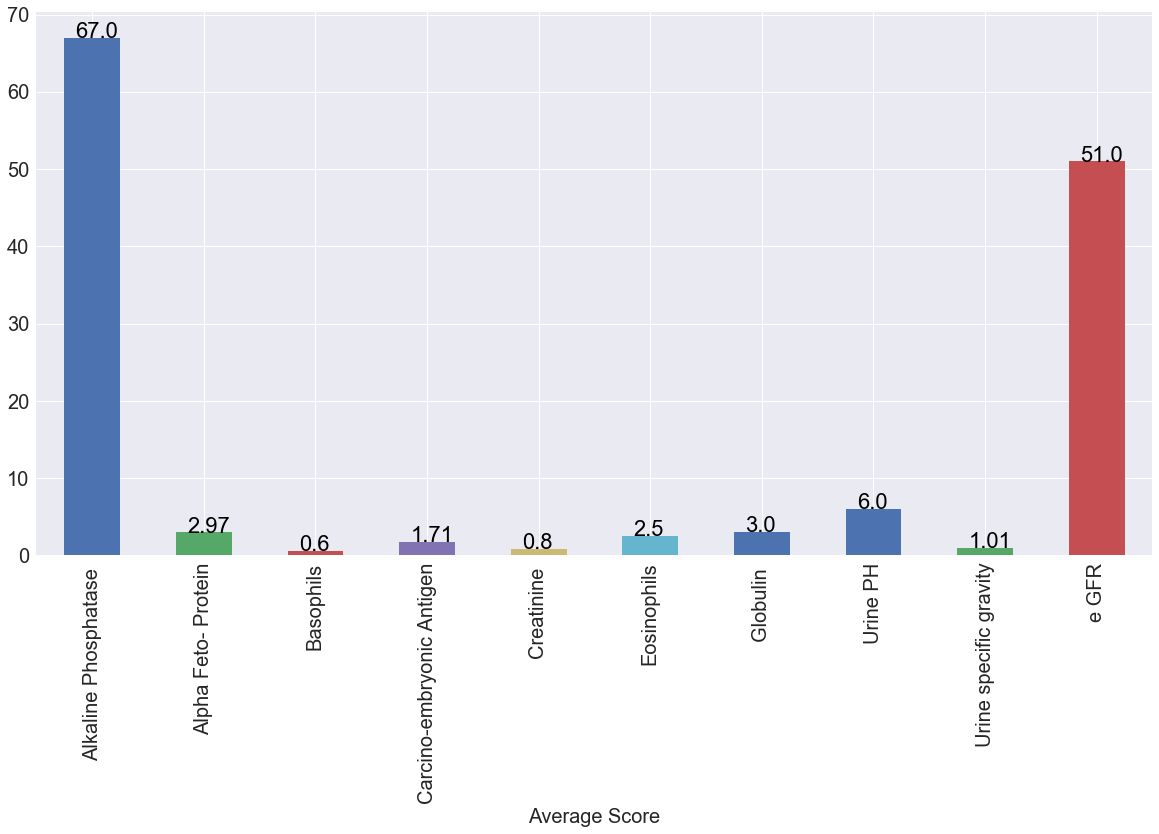

In [9]:
#Count median score per test name
ax = df1.groupby(['Name']).median()['Score'].plot(figsize=(20,10), kind='bar', fontsize=20)
plt.xlabel('Average Score', fontsize=20);

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.1, i.get_height(), \
            str(round(i.get_height(), 2)), fontsize=22,
                color='black')

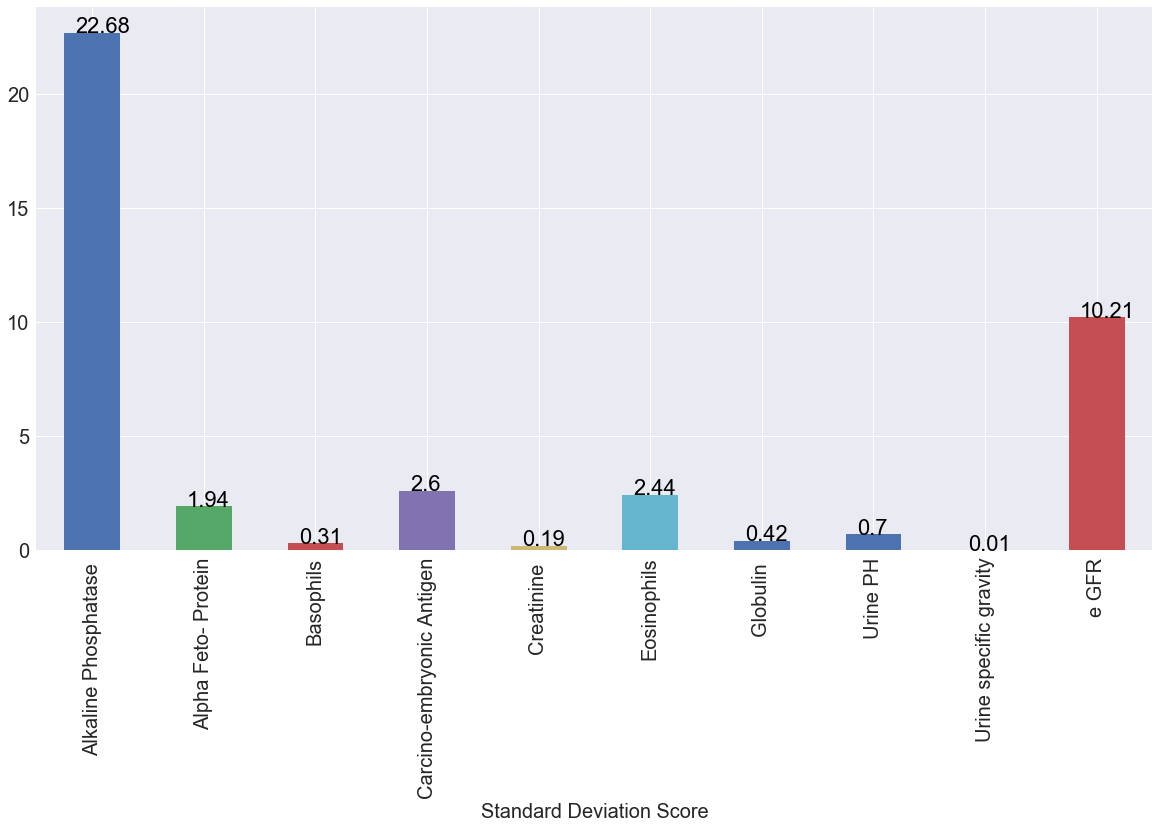

In [10]:
#Count standard deviation per test name
ax = df1.groupby(['Name']).std()['Score'].plot(figsize=(20,10), kind='bar', fontsize=20)
plt.xlabel('Standard Deviation Score', fontsize=20);

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.1, i.get_height(), \
            str(round(i.get_height(), 2)), fontsize=22,
                color='black')

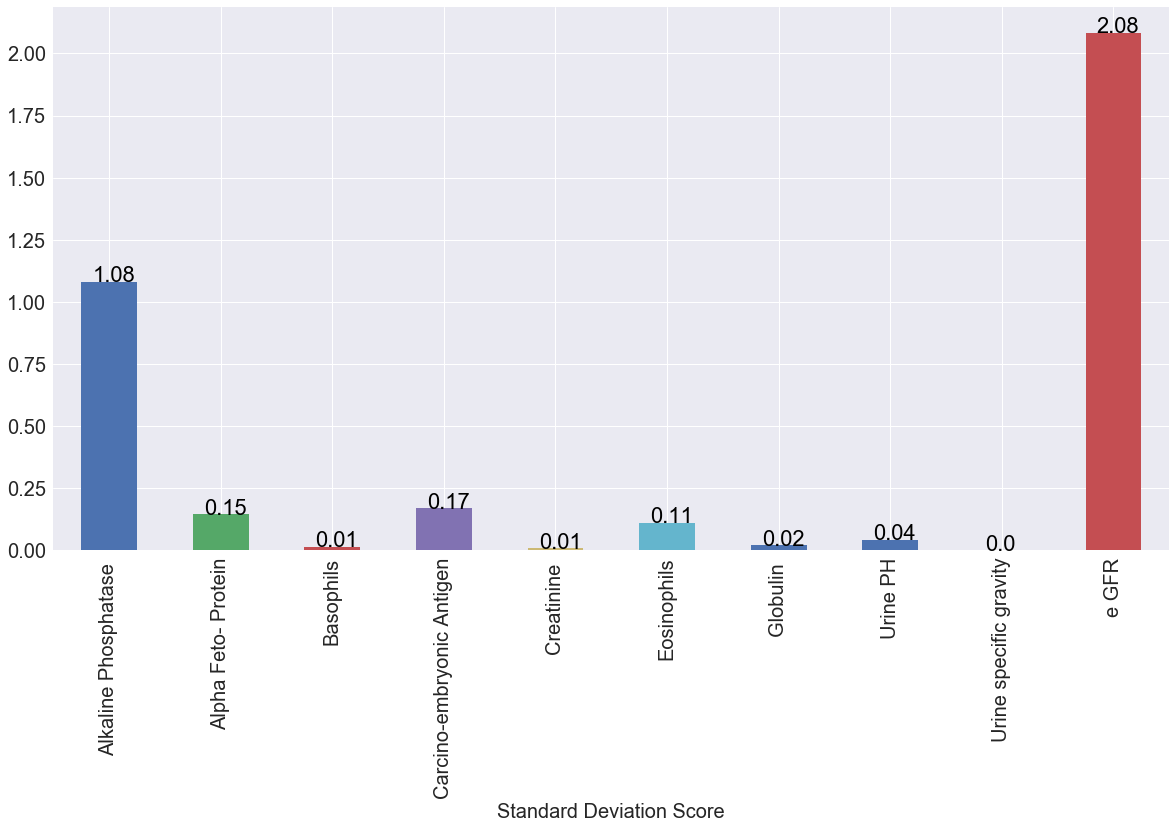

In [11]:
#Count standard error per test name
ax = df1.groupby(['Name']).sem()['Score'].plot(figsize=(20,10), kind='bar', fontsize=20)
plt.xlabel('Standard Deviation Score', fontsize=20);

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.1, i.get_height(), \
            str(round(i.get_height(), 2)), fontsize=22,
                color='black')

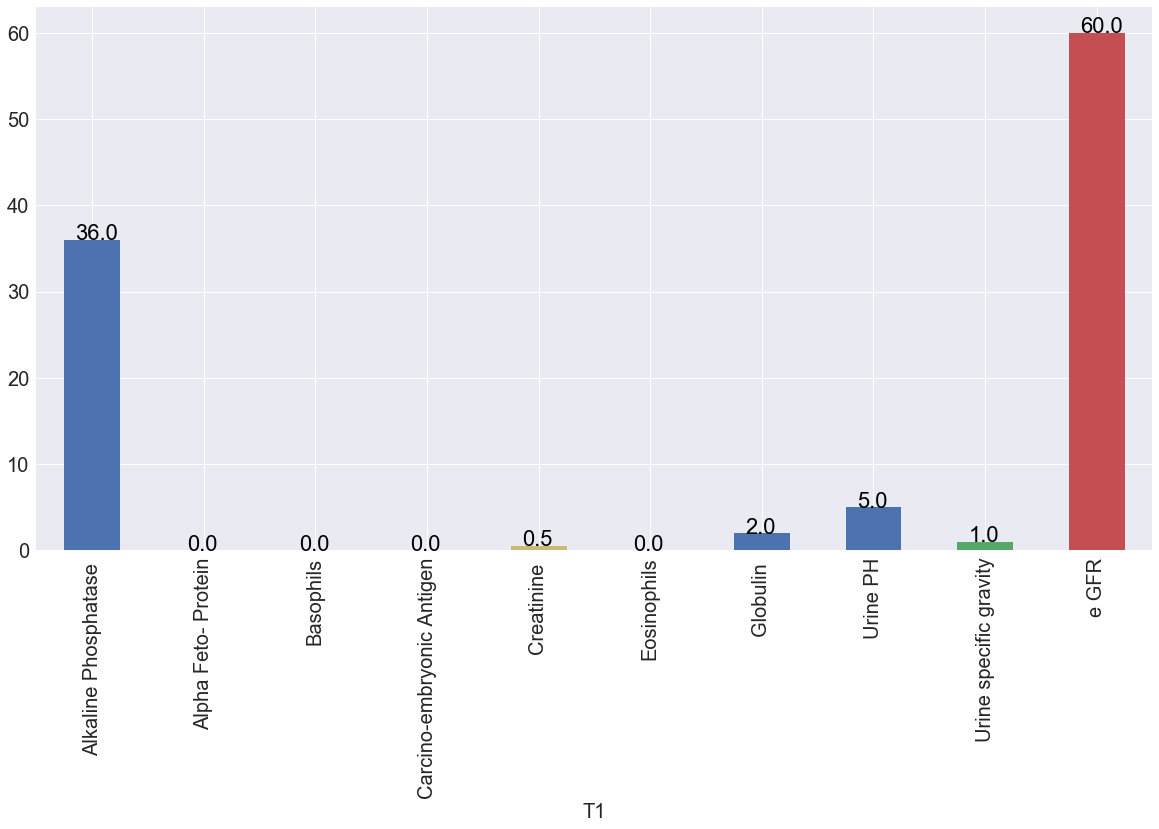

In [12]:
#Count mean T1 per test name
ax = df1.groupby(['Name']).mean()['T1'].plot(figsize=(20,10), kind='bar', fontsize=20)
plt.xlabel('T1', fontsize=20);

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.1, i.get_height(), \
            str(round(i.get_height(), 2)), fontsize=22,
                color='black')

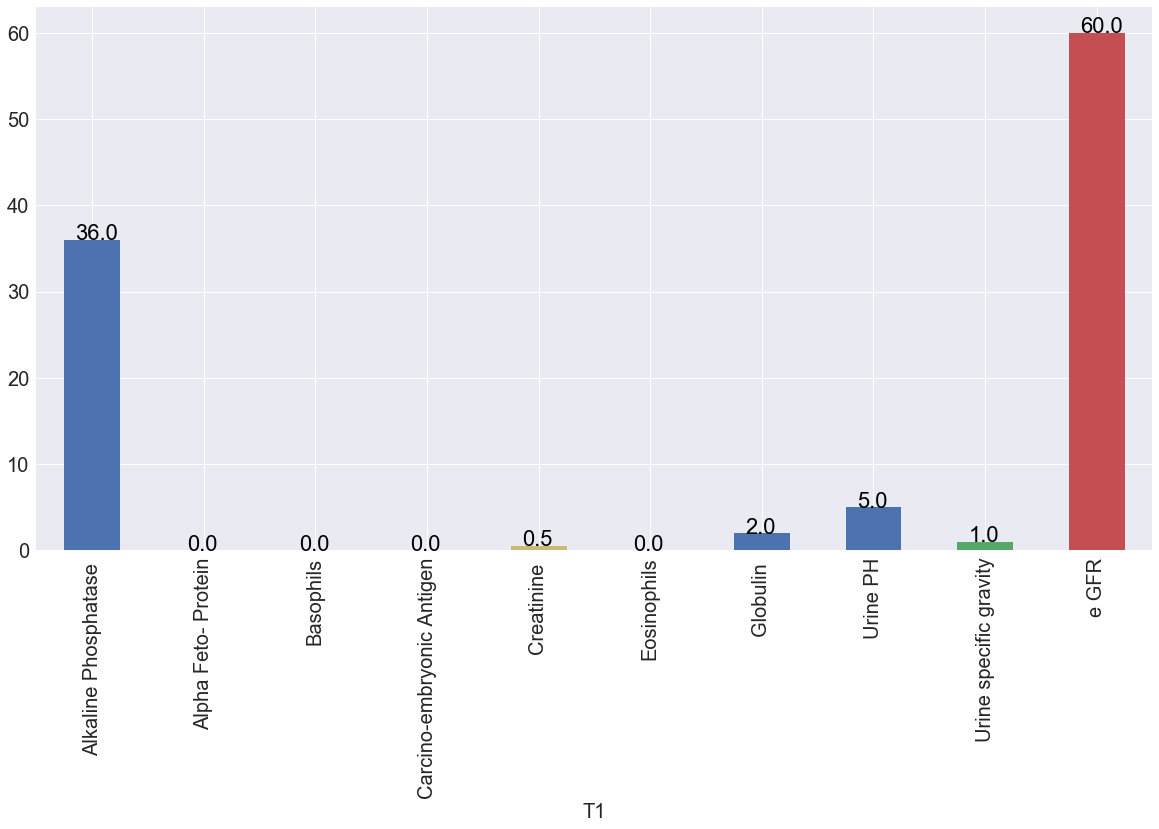

In [13]:
#Count median T1 per test name
ax = df1.groupby(['Name']).median()['T1'].plot(figsize=(20,10), kind='bar', fontsize=20)
plt.xlabel('T1', fontsize=20);

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.1, i.get_height(), \
            str(round(i.get_height(), 2)), fontsize=22,
                color='black')

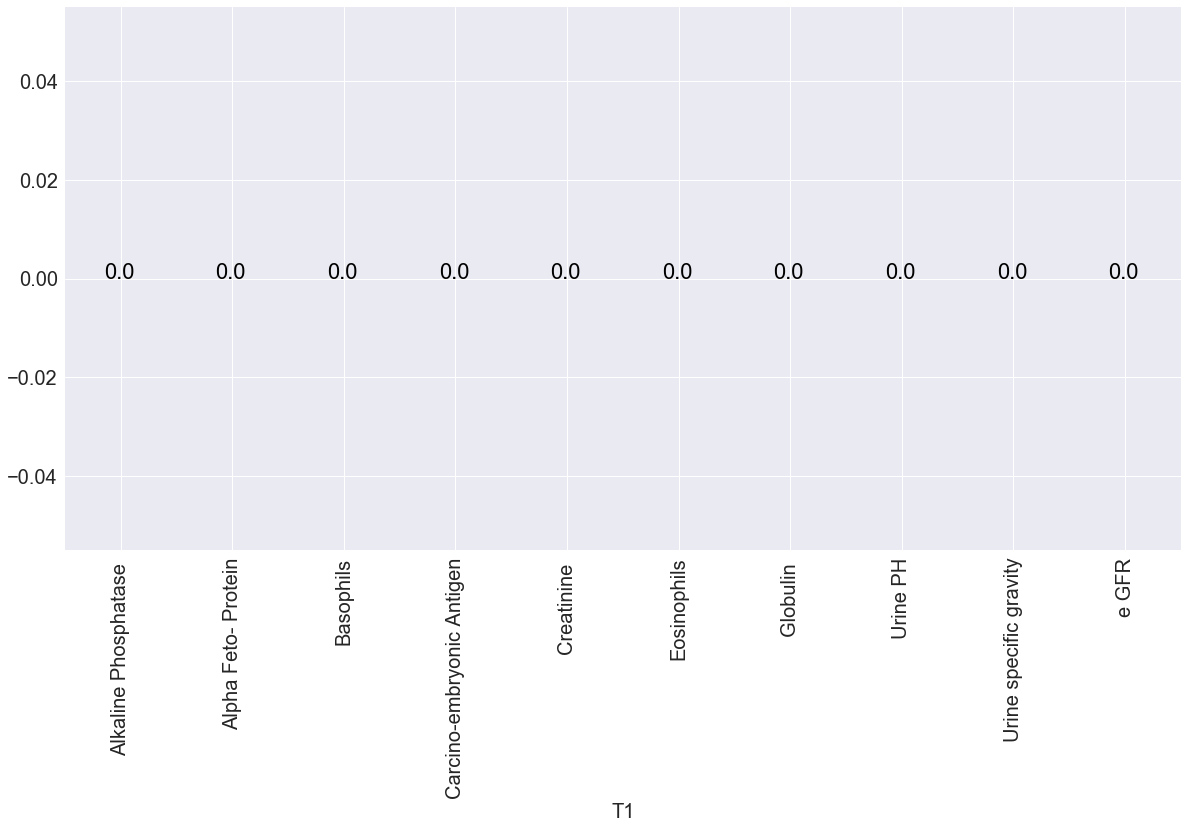

In [14]:
#count standard deviation for T1 per test name
ax = df1.groupby(['Name']).std()['T1'].plot(figsize=(20,10), kind='bar', fontsize=20)
plt.xlabel('T1', fontsize=20);

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.1, i.get_height(), \
            str(round(i.get_height(), 2)), fontsize=22,
                color='black')

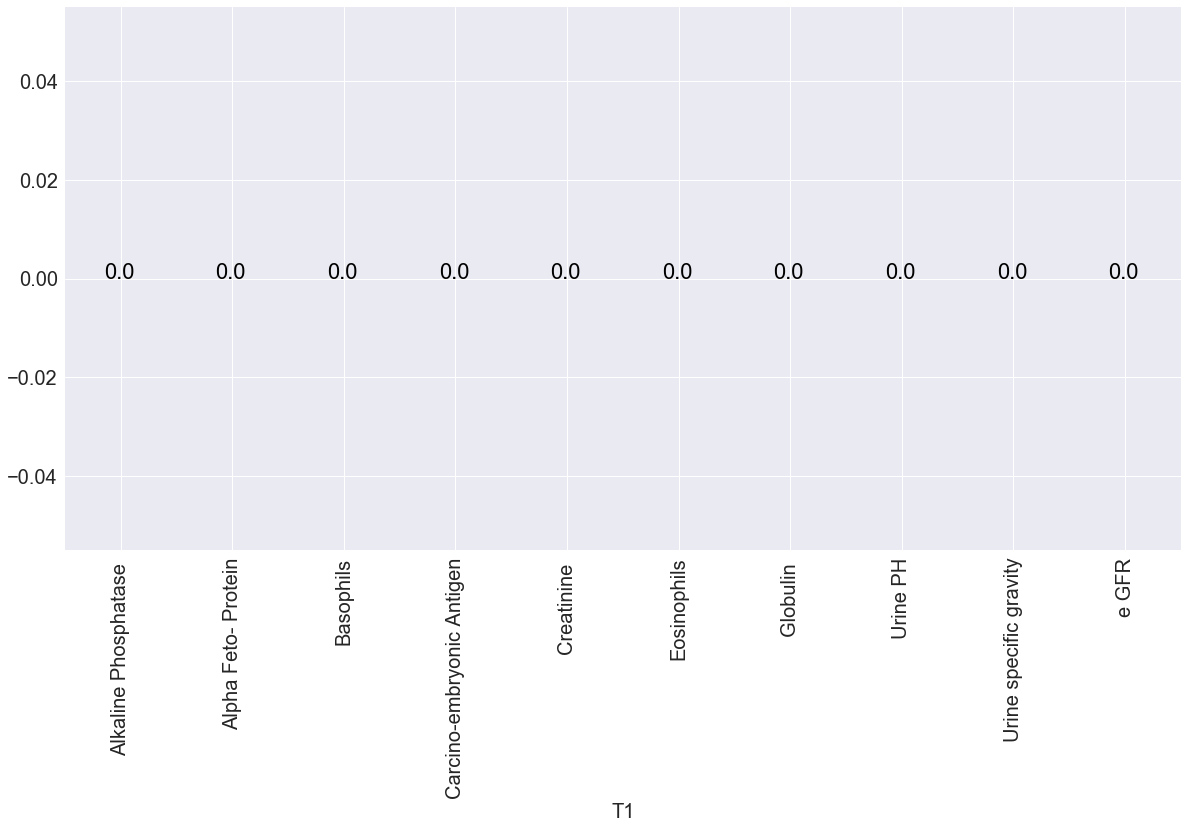

In [15]:
#Count standard error for T1 per test name
ax = df1.groupby(['Name']).sem()['T1'].plot(figsize=(20,10), kind='bar', fontsize=20)
plt.xlabel('T1', fontsize=20);

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.1, i.get_height(), \
            str(round(i.get_height(), 2)), fontsize=22,
                color='black')

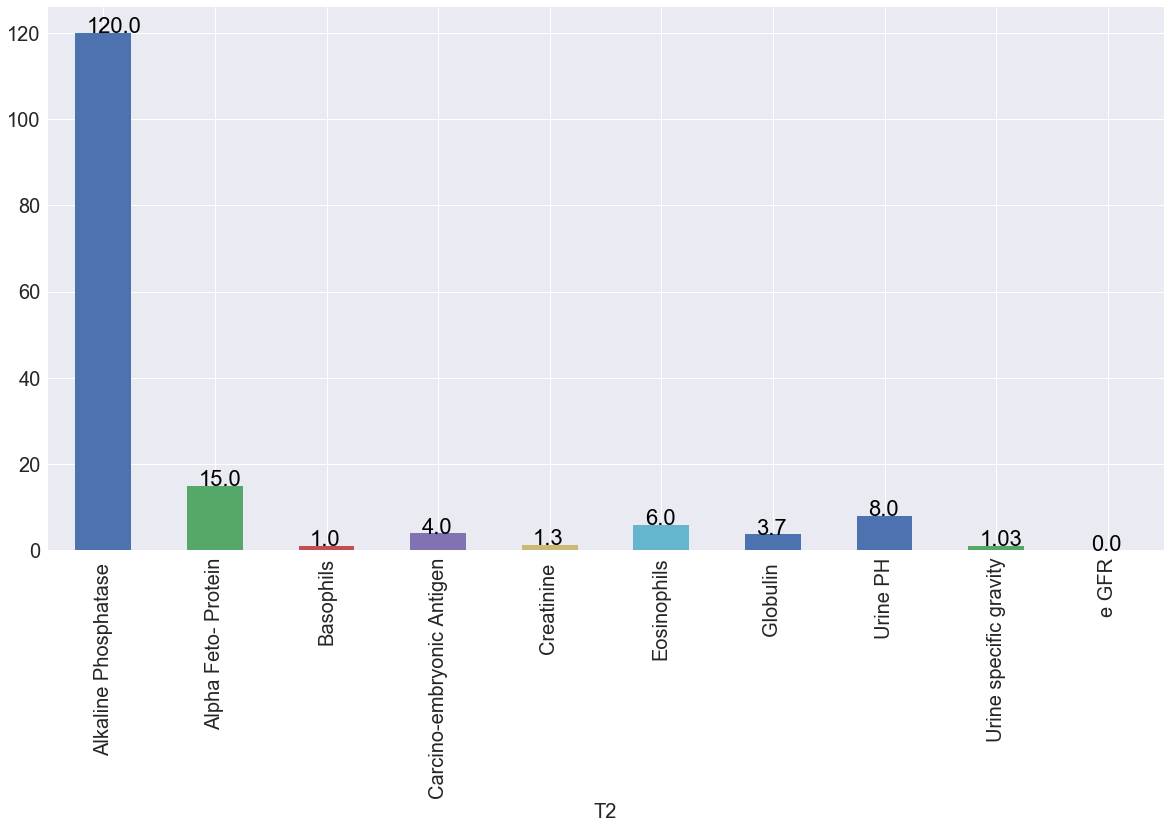

In [16]:
#count mean T2 per test name
ax = df1.groupby(['Name']).mean()['T2'].plot(figsize=(20,10), kind='bar', fontsize=20)
plt.xlabel('T2', fontsize=20);

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.1, i.get_height(), \
            str(round(i.get_height(), 2)), fontsize=22,
                color='black')

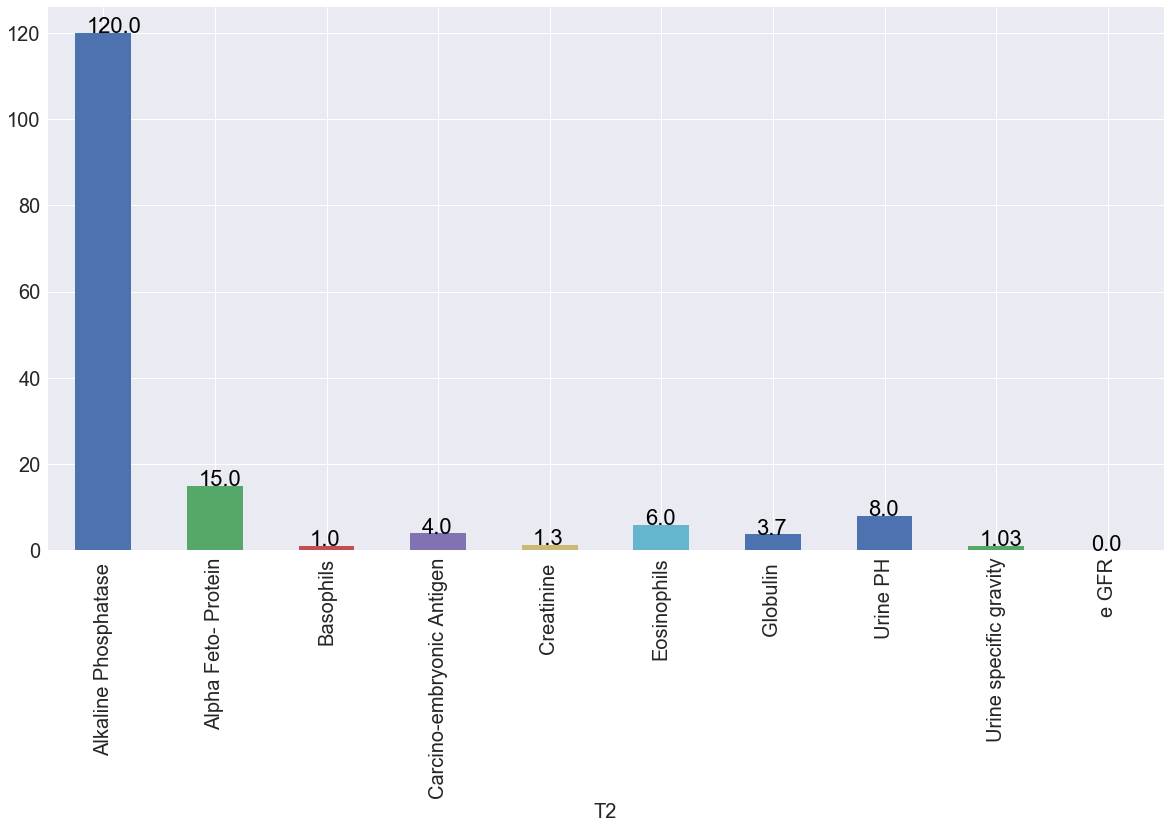

In [17]:
#count median T2 per test name
ax = df1.groupby(['Name']).median()['T2'].plot(figsize=(20,10), kind='bar', fontsize=20)
plt.xlabel('T2', fontsize=20);

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.1, i.get_height(), \
            str(round(i.get_height(), 2)), fontsize=22,
                color='black')

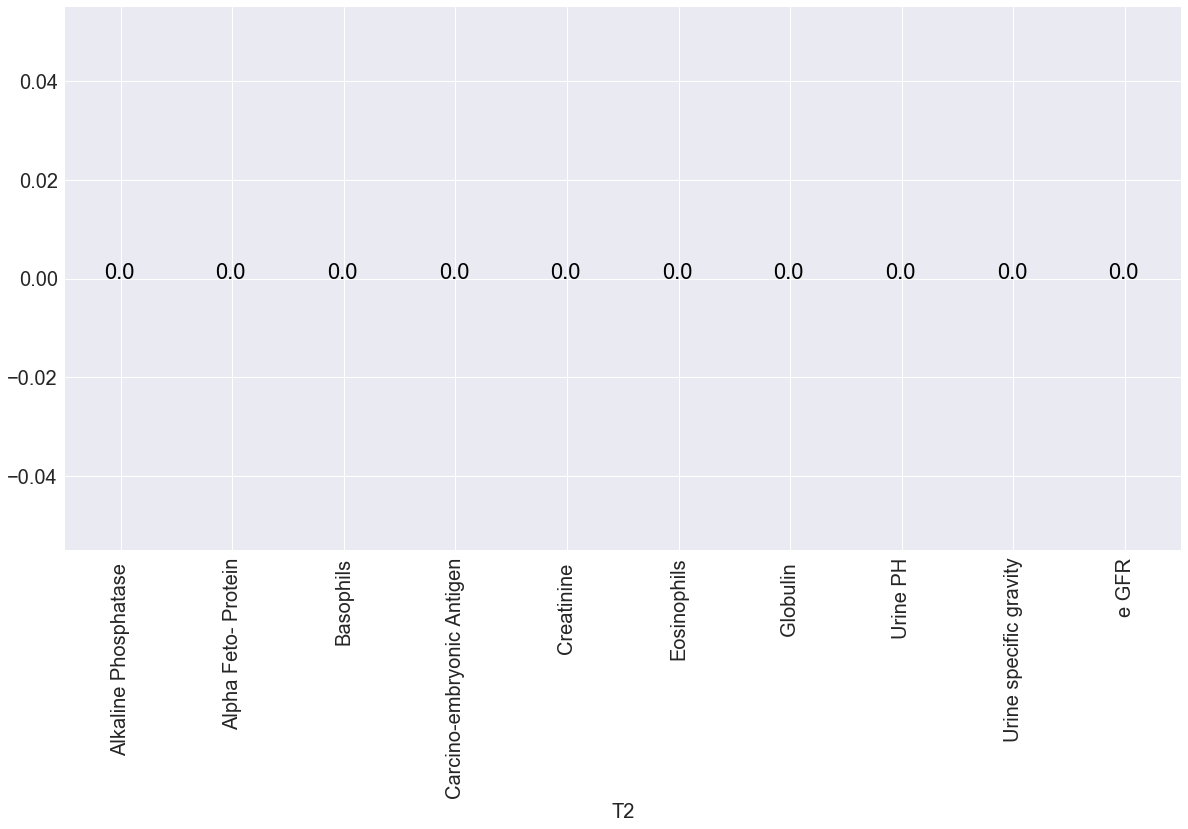

In [18]:
#Count standard deviation for T2 per test name
ax = df1.groupby(['Name']).std()['T2'].plot(figsize=(20,10), kind='bar', fontsize=20)
plt.xlabel('T2', fontsize=20);

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.1, i.get_height(), \
            str(round(i.get_height(), 2)), fontsize=22,
                color='black')

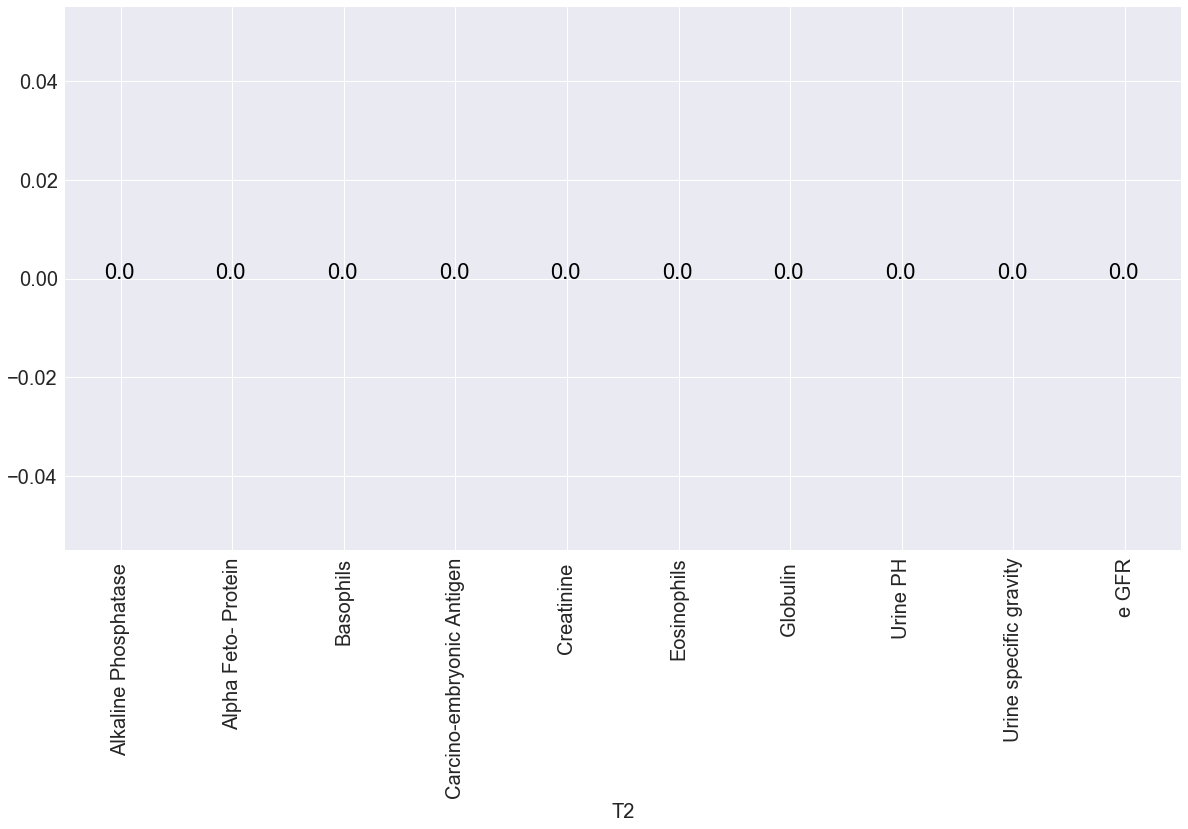

In [19]:
#Count standard error for T2 per test name
ax = df1.groupby(['Name']).sem()['T2'].plot(figsize=(20,10), kind='bar', fontsize=20)
plt.xlabel('T2', fontsize=20);

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.1, i.get_height(), \
            str(round(i.get_height(), 2)), fontsize=22,
                color='black')

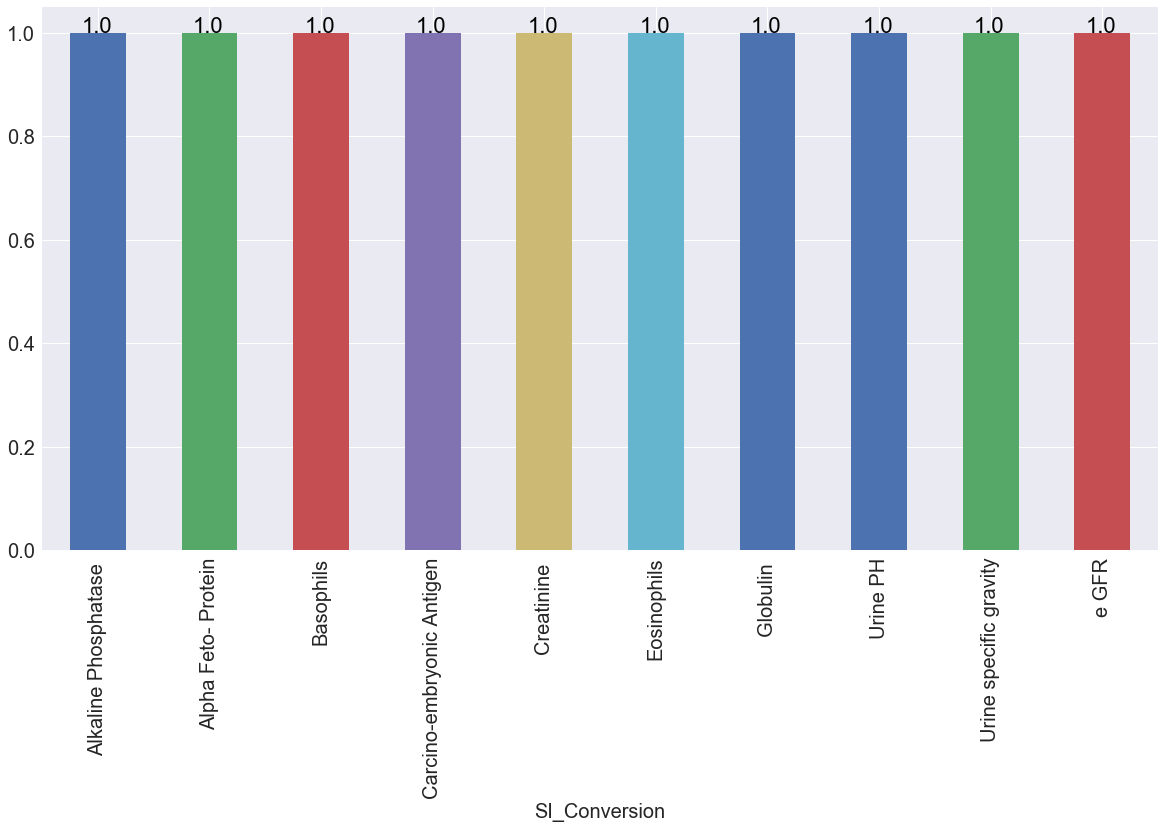

In [20]:
#Count mean for SI_Conversion per test name
ax = df1.groupby(['Name']).mean()['SI_Conversion'].plot(figsize=(20,10), kind='bar', fontsize=20)
plt.xlabel('SI_Conversion', fontsize=20);

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.1, i.get_height(), \
            str(round(i.get_height(), 2)), fontsize=22,
                color='black')

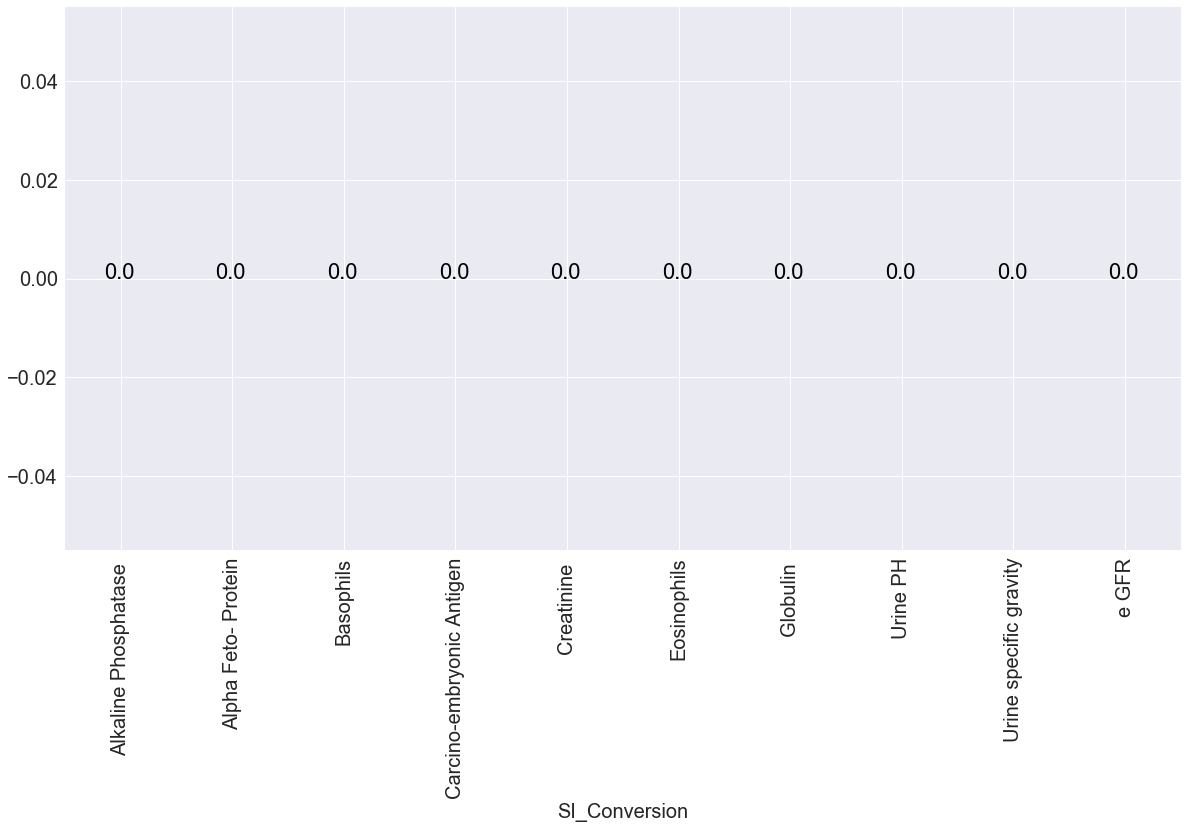

In [21]:
#Count standard deviation for SI_Conversion per test name
ax = df1.groupby(['Name']).std()['SI_Conversion'].plot(figsize=(20,10), kind='bar', fontsize=20)
plt.xlabel('SI_Conversion', fontsize=20);

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.1, i.get_height(), \
            str(round(i.get_height(), 2)), fontsize=22,
                color='black')

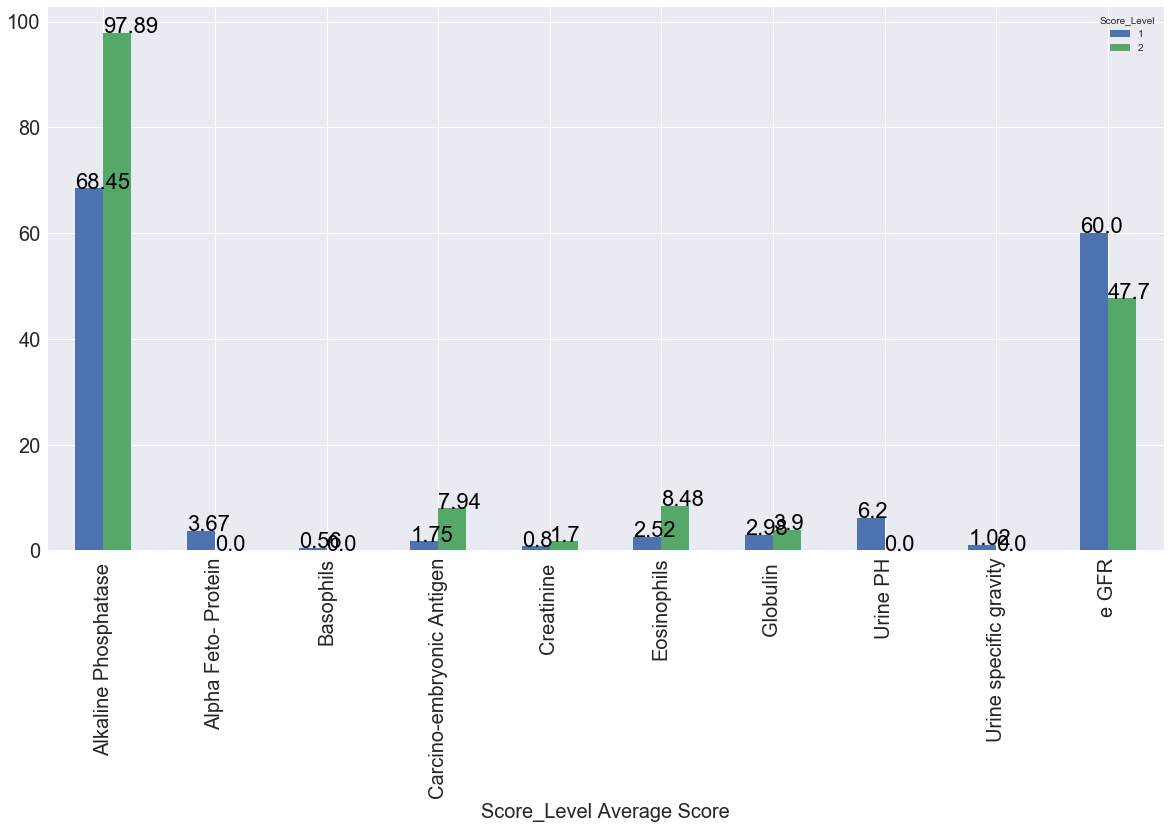

In [22]:
#Count average score for each score level per test name
ax = df1.groupby(['Name','Score_Level']).mean().unstack()['Score'].plot(figsize=(20,10), kind='bar', fontsize=20)
plt.xlabel('Score_Level Average Score', fontsize=20);

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height(), \
            str(round(i.get_height(), 2)), fontsize=22,
                color='black')

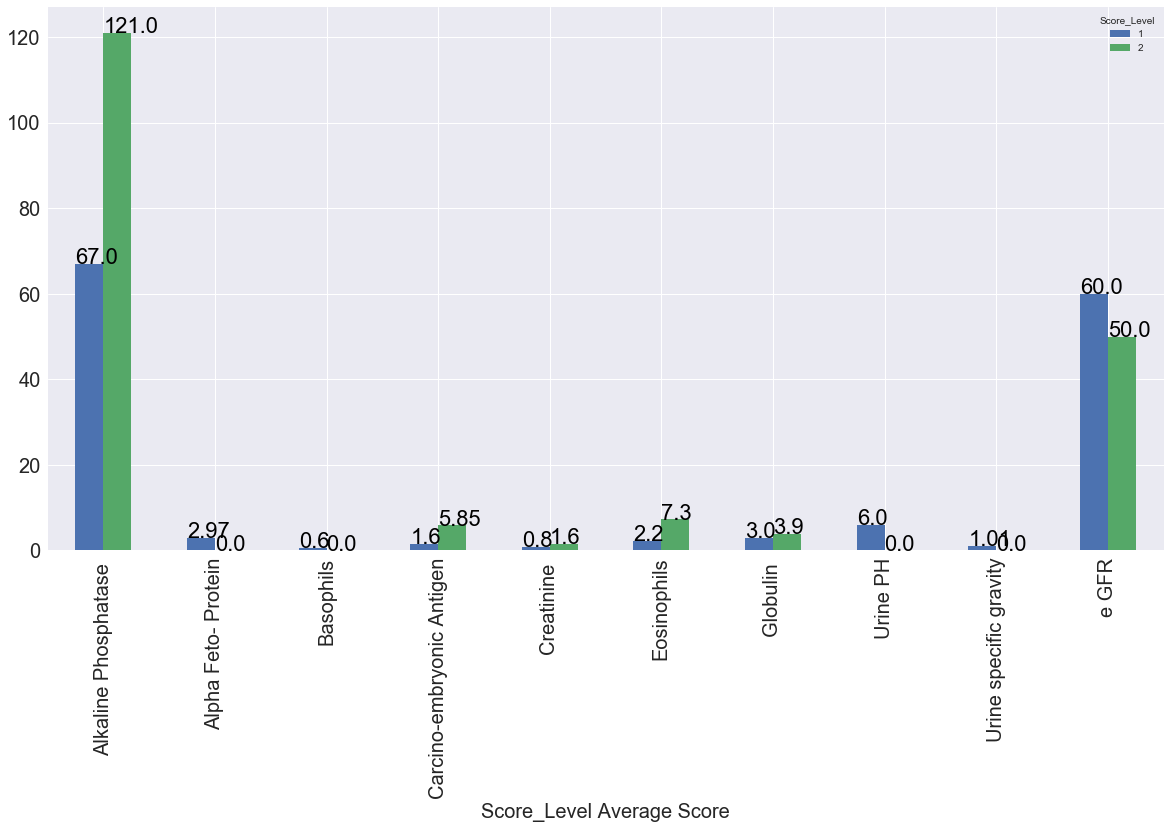

In [23]:
#Count median score for each score level per test name
ax = df1.groupby(['Name','Score_Level']).median().unstack()['Score'].plot(figsize=(20,10), kind='bar', fontsize=20)
plt.xlabel('Score_Level Average Score', fontsize=20);

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height(), \
            str(round(i.get_height(), 2)), fontsize=22,
                color='black')

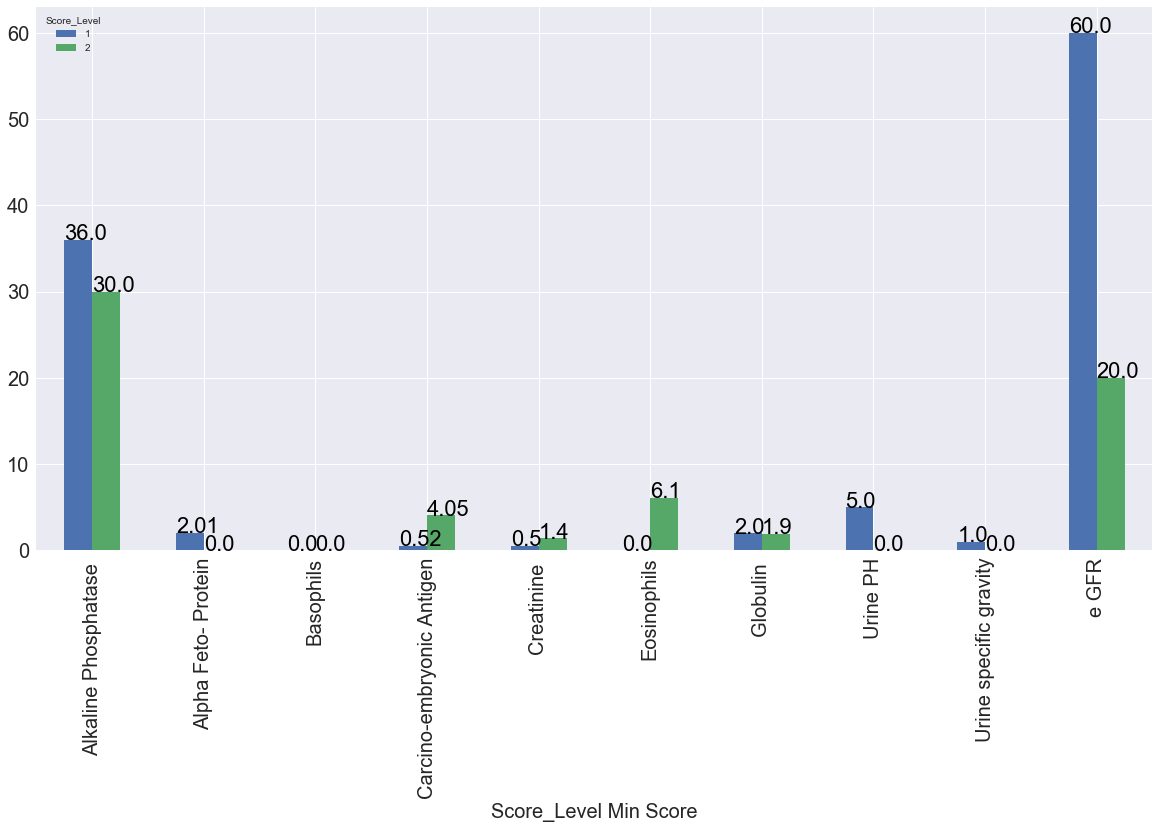

In [24]:
#Count min score for each score level per test name
ax = df1.groupby(['Name','Score_Level']).min().unstack()['Score'].plot(figsize=(20,10), kind='bar', fontsize=20)
plt.xlabel('Score_Level Min Score', fontsize=20);

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height(), \
            str(round(i.get_height(), 2)), fontsize=22,
                color='black')

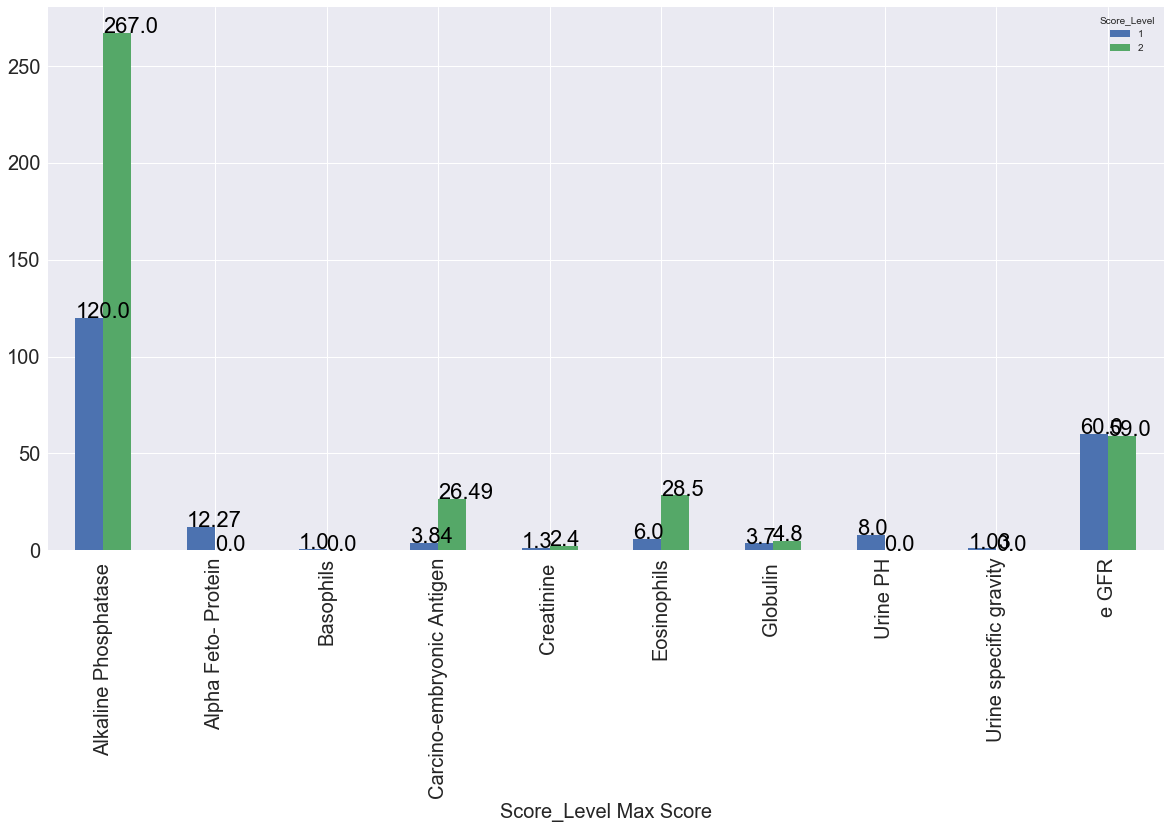

In [25]:
#Count max score for each score level per test name
ax = df1.groupby(['Name','Score_Level']).max().unstack()['Score'].plot(figsize=(20,10), kind='bar', fontsize=20)
plt.xlabel('Score_Level Max Score', fontsize=20);

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height(), \
            str(round(i.get_height(), 2)), fontsize=22,
                color='black')